# Lab 3

by Vsevolod Klyushev

# Task 1

Obtain by simulations the Poisson tail and plot it for three different values of µ as a function of t. 

Then, on the same figure, plot the theoretical bound on the same tail found in the lecture notes. 

Is the the derived theoretical bound correct? Is it tight?

We should recall, that theroretical bound works only for $t \geq \mu$

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def get_poisson_distribution(mu, n):
    p = mu/n
    xs = np.random.choice(a=[0, 1], size=n, p=[1-p, p])
    return np.sum(xs)

def get_theoretical_bound(mu, t):
    return np.exp(-mu) * (np.e * mu / t)**t 

def get_simulation_results(sums, t):
    return np.sum([float(val >= t) for val in sums]) / len(sums)

In [ ]:
def test_for_PD_with_mus(mus, ts, n=10000, N=10000, need_yscale=True):
    plt.figure(figsize=(16, 9))
    plt.title("Comparison for different mu")
    cmap = plt.get_cmap('hsv', len(mus)*2)
    
    for i, mu in enumerate(mus):
        sums = [get_poisson_distribution(mu, n) for _ in range(N)]
        plt.plot(ts, [get_simulation_results(sums=sums, t=t) for t in ts], label=f"Simulation for mu={mu}", color=cmap(i*2))
        plt.plot(ts,  [get_theoretical_bound(mu, t) for t in ts], label=f"Theoretical bound for mu={mu}", linestyle="--", color=cmap(i*2))
    
    if need_yscale:
        plt.yscale("log")
    plt.xlabel("t")
    plt.ylabel(r"$Pr\{S_n \geq t\}$")
    plt.legend()
    plt.grid()
    plt.show()

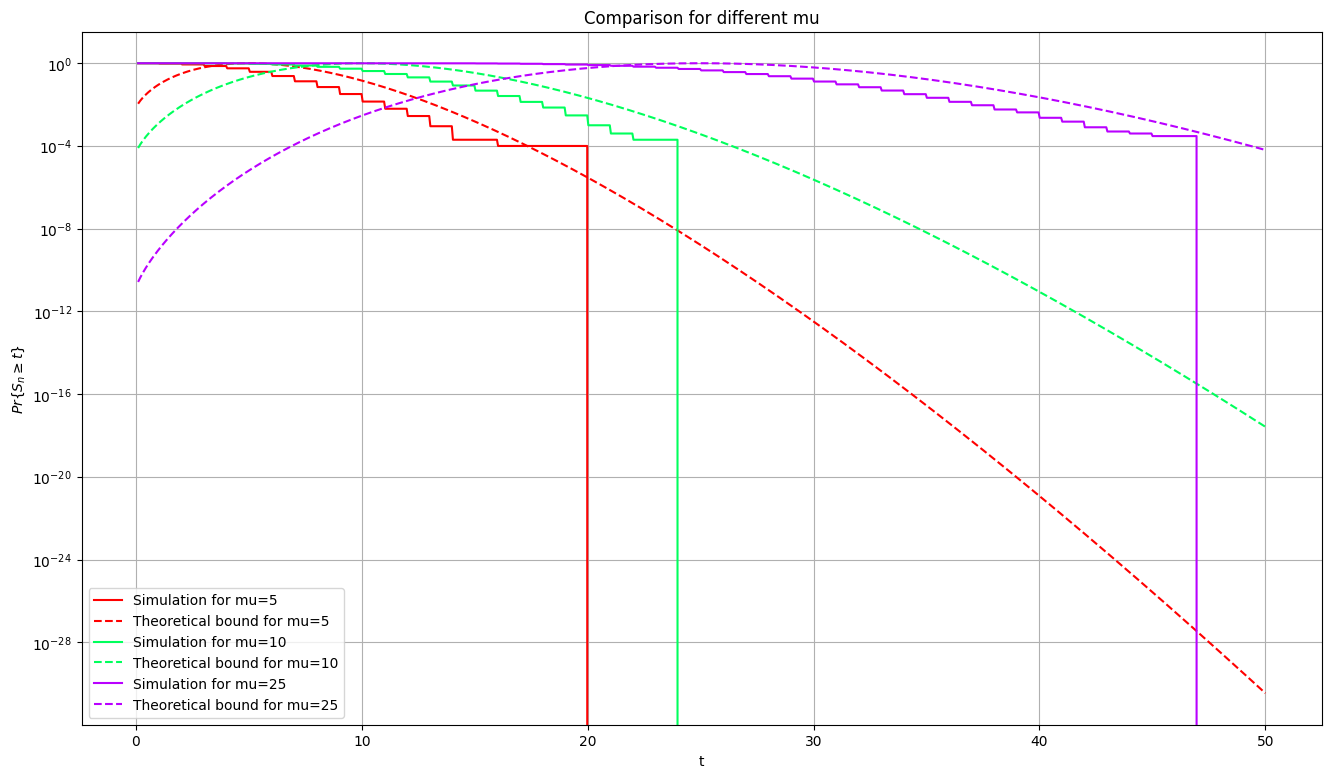

In [ ]:
test_for_PD_with_mus([5, 10, 25], np.linspace(0.1, 50, 1000))

In order to see only cases, when $t \geq \mu$ let's change our function

In [38]:
def find_starting_point(ts, mu):
    for i in range(len(ts)):
        if ts[i] >= mu:
            return i
    return 0

def test_for_PD_with_mus_geq(mus, ts, n=10000, N=10000, need_yscale=True):
    plt.figure(figsize=(16, 9))
    plt.title("Comparison for different mu")
    cmap = plt.get_cmap('hsv', len(mus)*2)
    
    for i, mu in enumerate(mus):
        sums = [get_poisson_distribution(mu, n) for _ in range(N)]
        idx = find_starting_point(ts, mu)
        plt.plot(ts[idx:], [get_simulation_results(sums=sums, t=t) for t in ts[idx:]], label=f"Simulation for mu={mu}", color=cmap(i*2))
        plt.plot(ts[idx:],  [get_theoretical_bound(mu, t) for t in ts[idx:]], label=f"Theoretical bound for mu={mu}", linestyle="--", color=cmap(i*2))
    
    if need_yscale:
        plt.yscale("log")
    plt.xlabel("t")
    plt.ylabel(r"$Pr\{S_n \geq t\}$")
    plt.legend()
    plt.grid()
    plt.show()

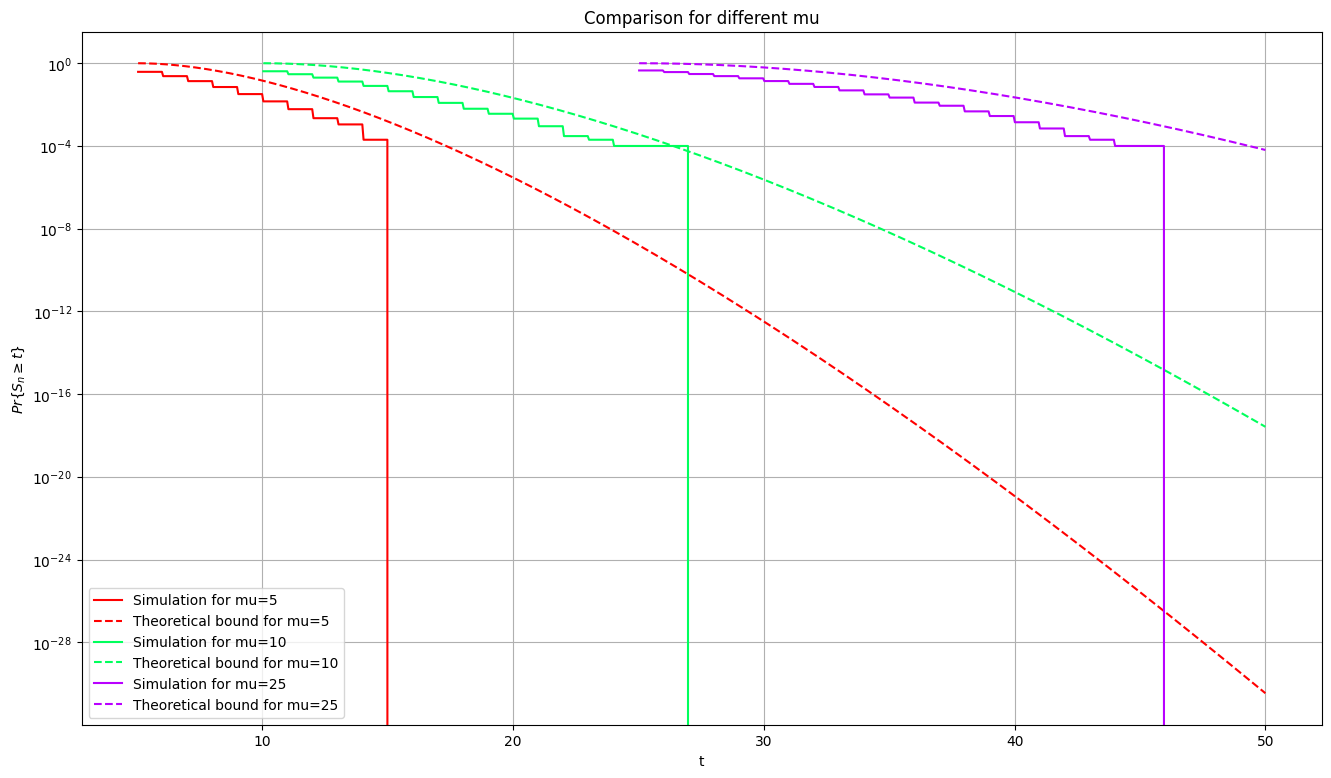

In [39]:
test_for_PD_with_mus_geq([5, 10, 25], np.linspace(0.1, 50, 1000))

Now we can see, that theoretical bounds are correct and pretty tight

# Task 2

Plot the same Poisson tail obtained by simulations as in 1). 

Then, on the same figure, plot the theoretical
bound on the same tail using Hoeffding’s inequality. 

Is the the derived theoretical bound correct? Is it tight?

Provide comments on your findings

So, let's state that Hoeffding's thoretical bound for out probplem is $e^{-\frac{2}{n}(t-\mu)^2}$

In [42]:
def get_hoef_theoretical_bound(mu, t, n):
    return np.exp(-2/n * (t-mu)**2) 

In [45]:
def test_for_PD_with_mus_hoef_geq(mus, ts, n=10000, N=10000, need_yscale=True):
    plt.figure(figsize=(16, 9))
    plt.title("Comparison for different mu")
    cmap = plt.get_cmap('hsv', len(mus)*2)
    
    for i, mu in enumerate(mus):
        sums = [get_poisson_distribution(mu, n) for _ in range(N)]
        idx = find_starting_point(ts, mu)
        plt.plot(ts[idx:], [get_simulation_results(sums=sums, t=t) for t in ts[idx:]], label=f"Simulation for mu={mu}", color=cmap(i*2))
        plt.plot(ts[idx:],  [get_hoef_theoretical_bound(mu, t, n) for t in ts[idx:]], label=f"Theoretical bound (Hoef) for mu={mu}", linestyle="--", color=cmap(i*2))
    
    if need_yscale:
        plt.yscale("log")
    plt.xlabel("t")
    plt.ylabel(r"$Pr\{S_n \geq t\}$")
    plt.legend()
    plt.grid()
    plt.show()

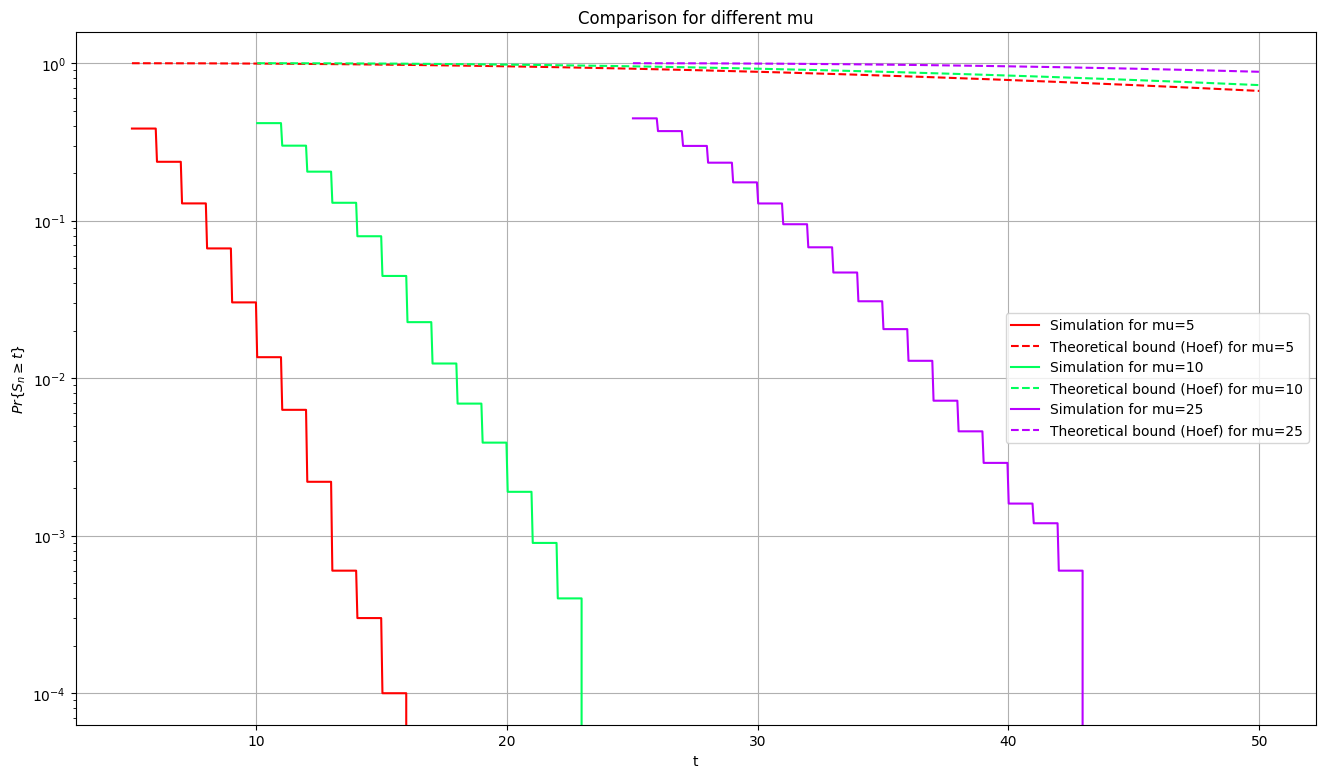

In [46]:
test_for_PD_with_mus_hoef_geq([5, 10, 25], np.linspace(0.1, 50, 1000))

Seems very loose, let's try with smaller n

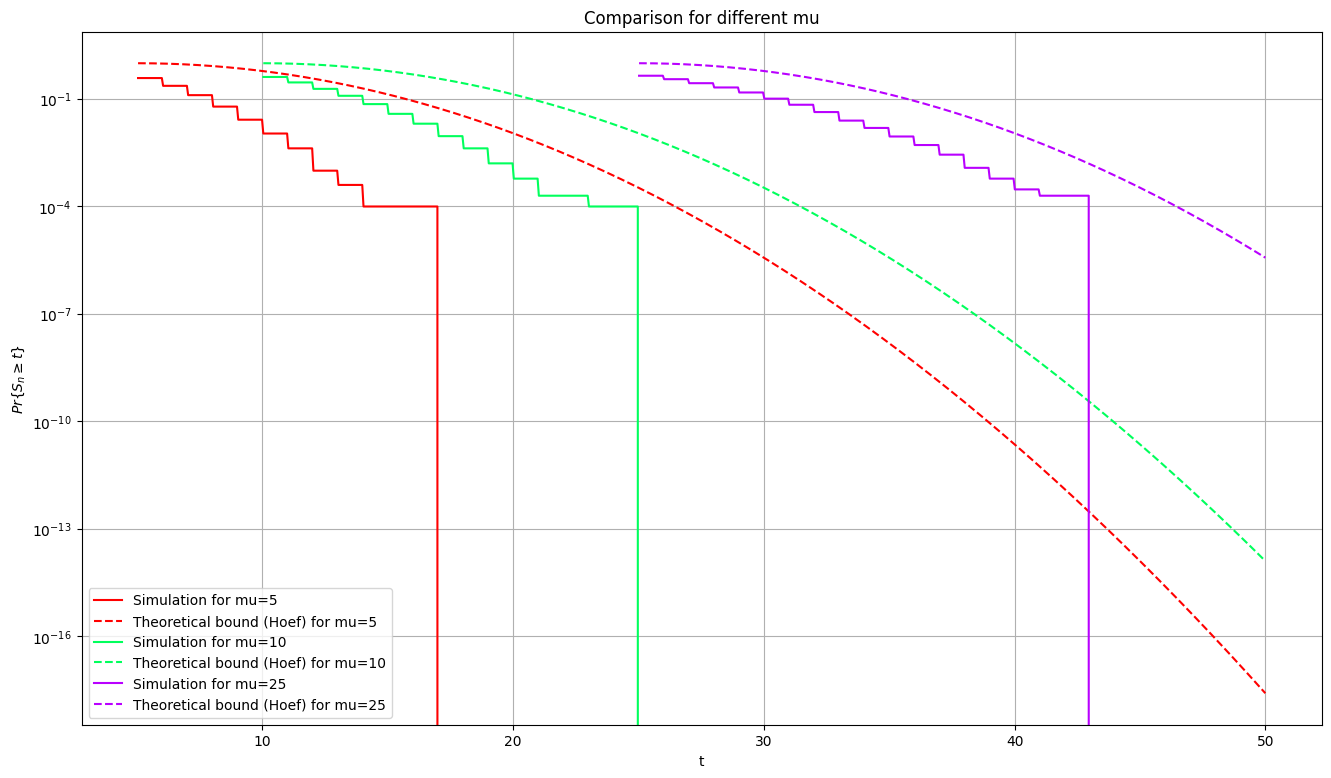

In [47]:
test_for_PD_with_mus_hoef_geq([5, 10, 25], np.linspace(0.1, 50, 1000), n=100)

As we can see, now bborders are much tighter. It's not a surprice, since as was mentioned in slides, the tail would be very loose for large n, if we use Hoeffding's inequality. The reason for this $\lim_{n \rightarrow \infty}e^{-1/n}=1$

# Task 3

In the lectures, we derived two conditions for random graphs. One when the graph is almost regular and the
other when the graph is sparse.

- Generate a random graph by simulations that satisfies the almost regular condition. Plot that graph and
see if it resembles visually an almost regular graph. Provide comments on your findings.
- Generate a random graph by simulations that satisfies the sparsity condition. Plot that graph and see if it
resembles visually a sparse graph. Provide comments on your findings.


So for almost regular condition we need $d \geq \frac{4}{\delta^2}\ln(\frac{2n}{\epsilon})$ where $\delta \in [0;1]$

As for sparse one: for $\gamma >> 1$ we meed d to satisfy 
$$\frac{1}{2n}\ln(\frac{1}{\epsilon})\frac{1}{1-1/\gamma-1/\gamma\ln(\gamma)}\leq d \leq \frac{1}{2(1 + \gamma \ln(\gamma))} \ln(n\frac{1}{\ln(1/\epsilon)})$$

In [30]:
def generate_graph(n, d):
    np.random.seed(n)
    p = d / (n-1)
    arr = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1, n):
            if np.random.rand() < p:
                arr[i,j] = 1
                arr[j,i] = 1
    return arr

def count_degree(arr):
    ans = [np.sum(arr[:][i]) for i in range(len(arr))]
    return ans

In [31]:
generate_graph(3, 1)

array([[0., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [61]:
import math
def get_d_for_almost_reg(n, err=1e-3, delta=1):
    return math.ceil(4/(delta**2) * math.log(2*n/err))

def get_d_left_border_for_sparse(n, err=1e-3, gamma=2):
    return math.ceil(1/(2*n) * math.log(1/err) * 1 / (1-1/gamma-1/gamma*math.log(gamma)))

def get_d_right_border_for_sparse(n, err=1e-3, gamma=2):
    return math.trunc(1/(2 * (1 + gamma * math.log(gamma))) * math.log(n / math.log(1/err)))

In [33]:
a = generate_graph(100, 49)
a

array([[0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [64]:
import networkx as nx

def plot_graph(n, d, title):
    graph = nx.from_numpy_array(generate_graph(n, d))
    node_positions = nx.spring_layout(graph)
    nx.draw(
        graph,
        node_positions,
        node_size=10,
    )
    plt.title(title)
    plt.show()

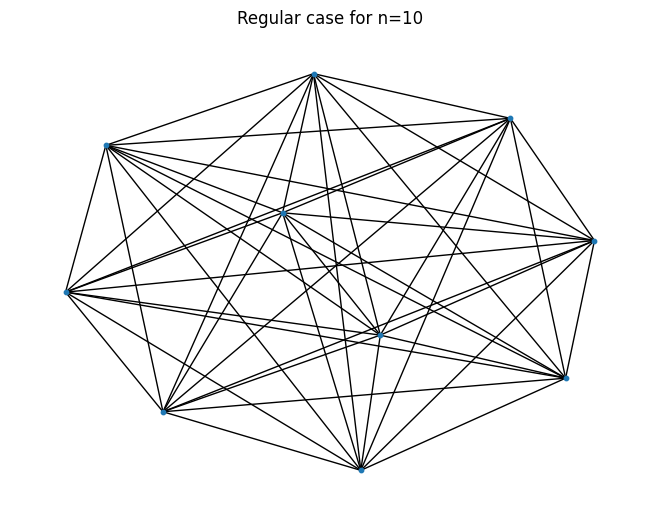

In [66]:
plot_graph(10, get_d_for_almost_reg(10), "Regular case for n=10")

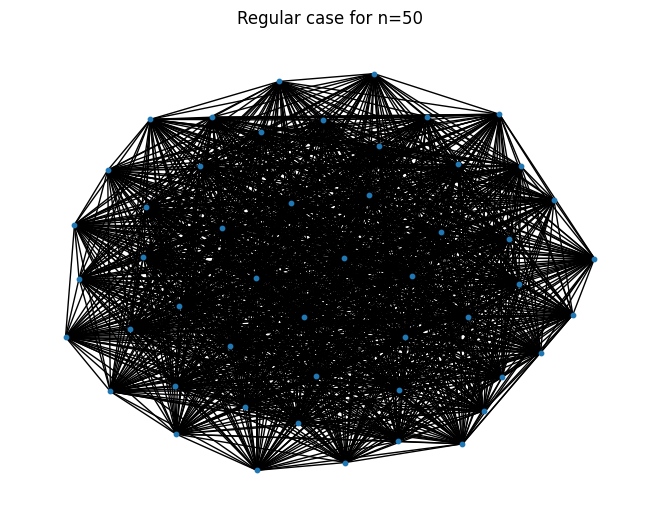

In [67]:
plot_graph(50, get_d_for_almost_reg(50), "Regular case for n=50")

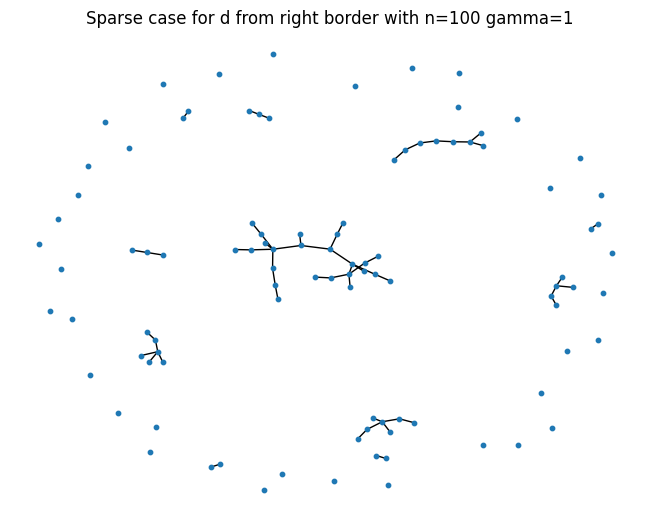

In [76]:
plot_graph(100, get_d_right_border_for_sparse(100, gamma=1), "Sparse case for d from right border with n=100 gamma=1")

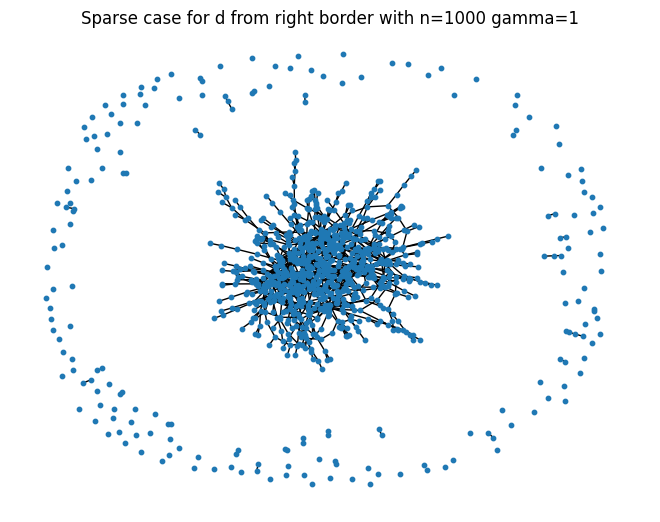

In [77]:
plot_graph(1000, get_d_right_border_for_sparse(1000, gamma=1), "Sparse case for d from right border with n=1000 gamma=1")

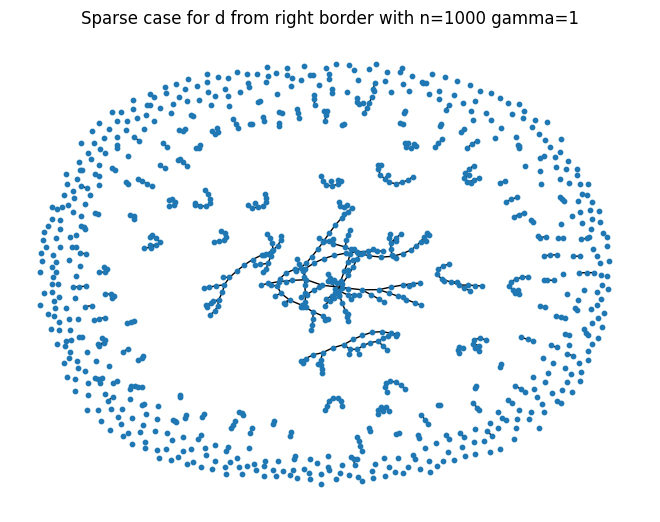

In [ ]:
plot_graph(1000, get_d_right_border_for_sparse(1000, gamma=2), "Sparse case for d from right border with n=1000 gamma=1")

In [89]:
get_d_right_border_for_sparse(1000, gamma=2)

1

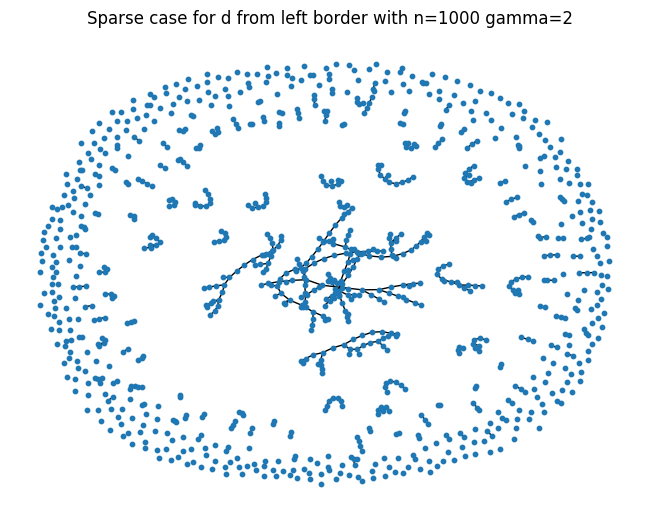

In [80]:
plot_graph(1000, get_d_left_border_for_sparse(1000, gamma=2), "Sparse case for d from left border with n=1000 gamma=2")

In [ ]:
get_d_left_border_for_sparse(1000, gamma=2)

1

In [100]:
get_d_left_border_for_sparse(100000, gamma=2), get_d_right_border_for_sparse(100000, gamma=2)

(1, 2)

As we can see, regular graphs looks regular, when sparse one looks sparse. Moreover, we can see, that for some parameters left border and right border are the same. We can also see, that we need to increase n drastically in order to increase d borders.